Importing necessary libraries

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal.windows import hann, flattop
from numpy.fft import fft, ifft, fftshift


Defining signal parameters - variant No 5

In [13]:
F1=300
F2=300.25
F3=299.75
FS=400
N=2000
TMPMU = 2

generating signals with fx period and n steps length

In [14]:
# signals generating
k= np.arange(N)
x1=np.sin(TMPMU*np.pi * F1/ FS *k)
x2=np.sin(TMPMU*np.pi * F2/ FS *k)
x3=np.sin(TMPMU*np.pi * F3/ FS *k)

plotting signals samples

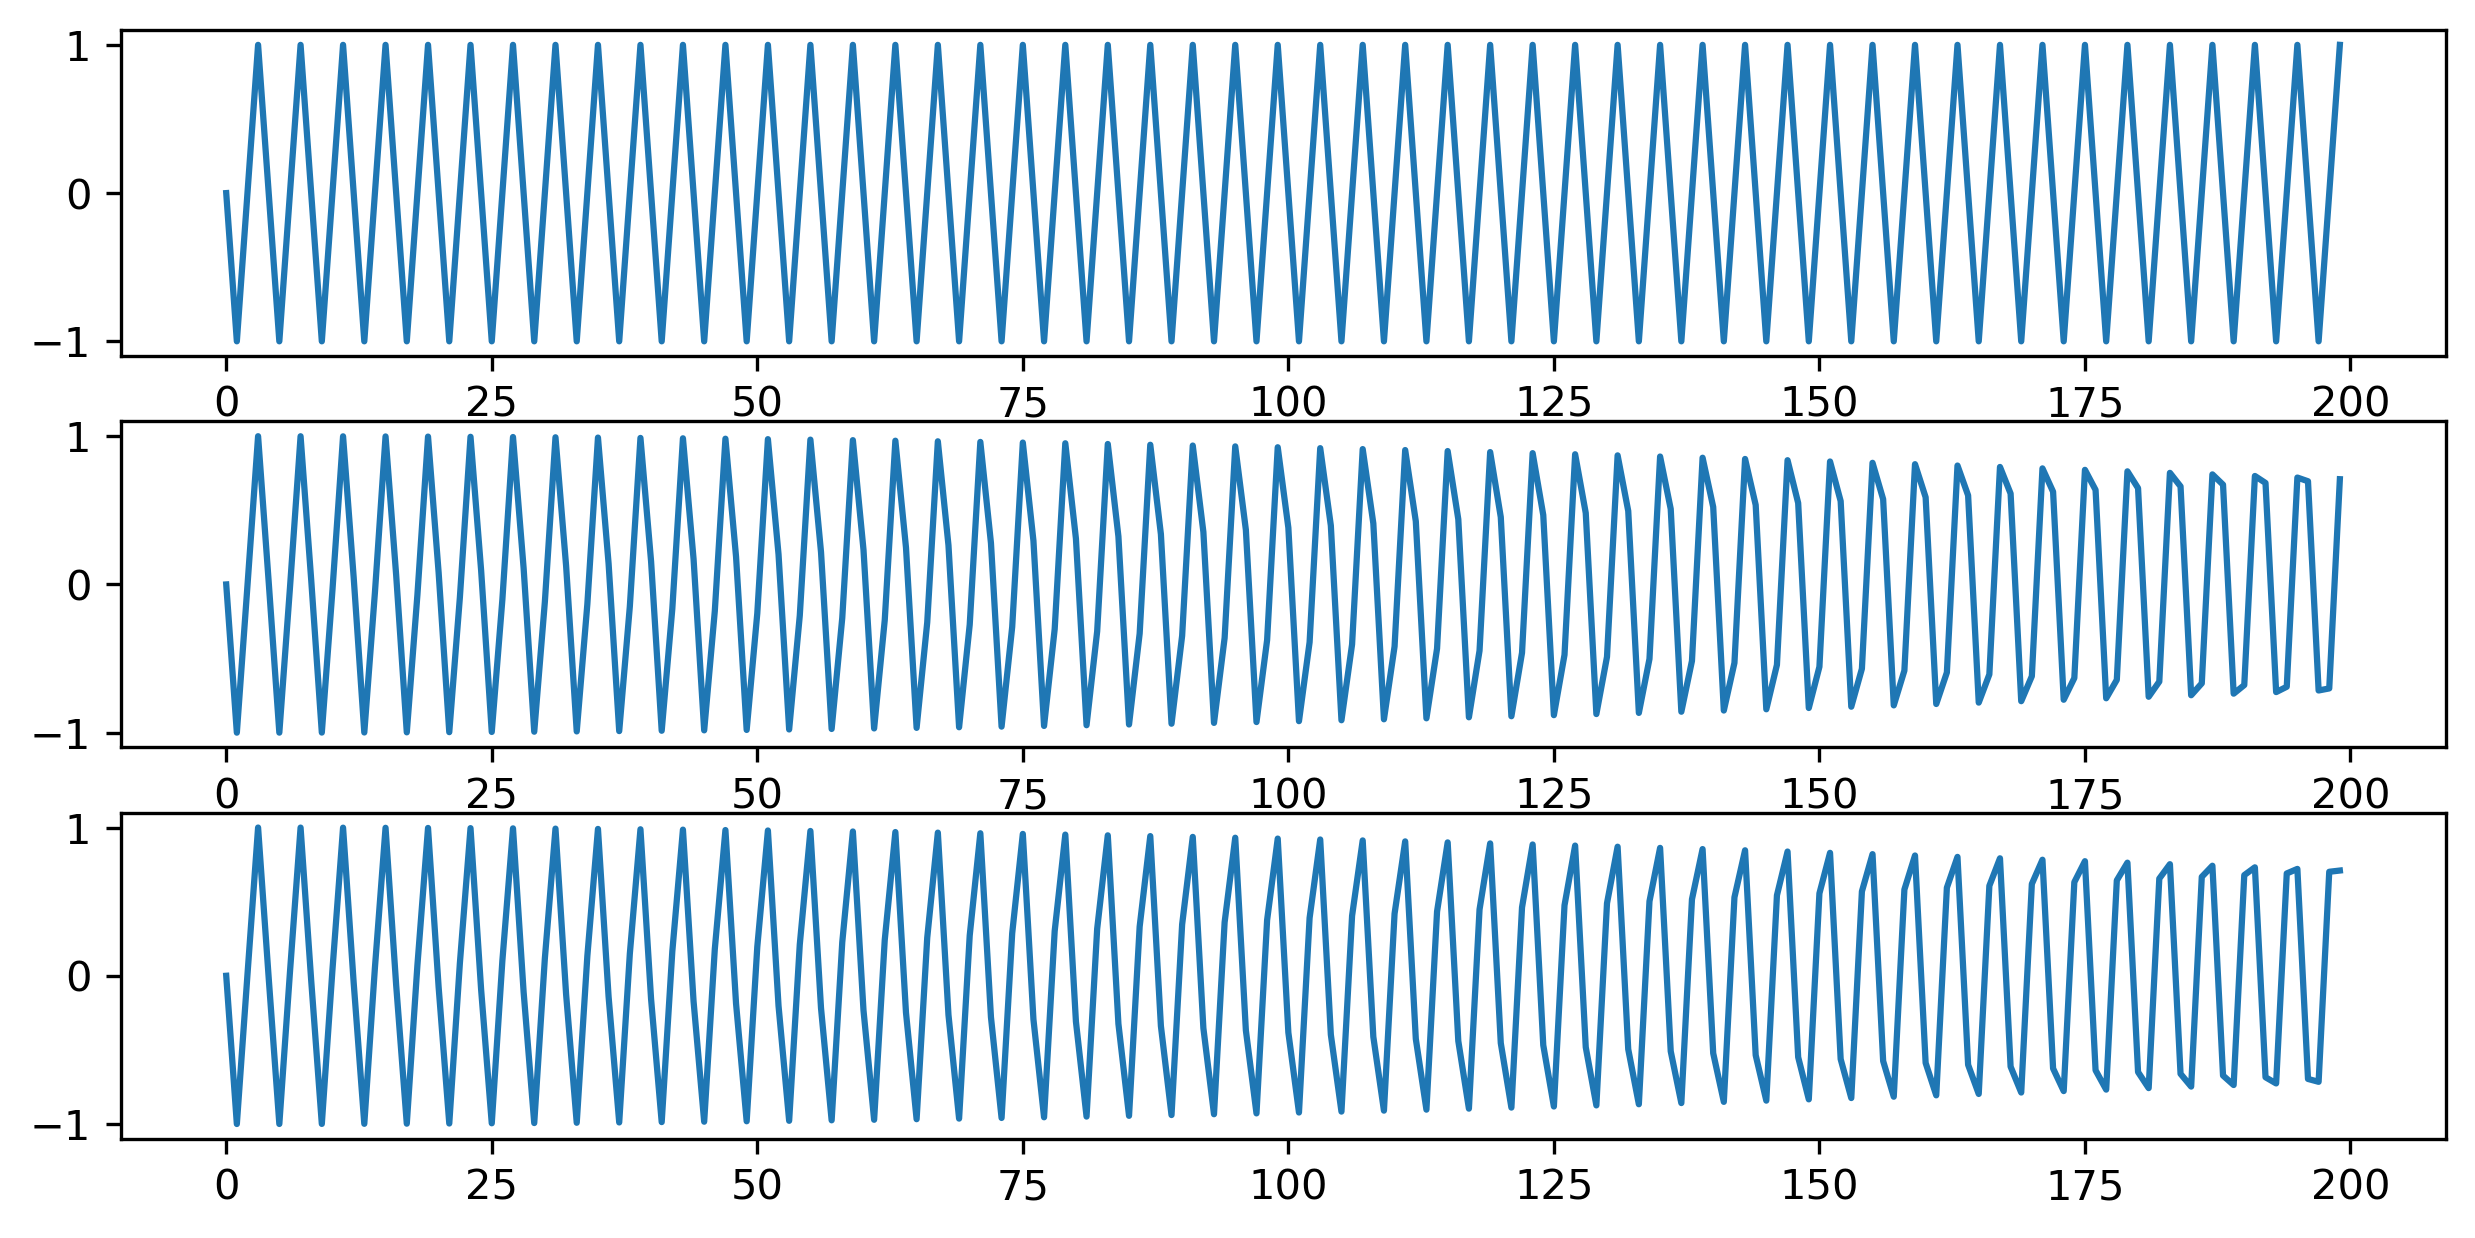

In [15]:
fig, axs = plt.subplots(3)
fig.set_dpi(300)
fig.set_figwidth(10)
axs[0].plot(x1[0:200])
axs[1].plot(x2[0:200])
axs[2].plot(x3[0:200])

Generating windows.<br>

Windows are define how signal samples are fetch.<br>
Windowing function defines differences between observed signal spectrum and observation result.<br>


The idea of windowing a signal is to force continuity at the boundaries, prior to performing the DFT or FFT. The simplest way to achieve this is by multiplying the signal x[n] by another signal w[n] of the same duration, such that w[0] = w[N-1] = 0, resulting in the windowed DFT or FFT X.

rectangural window - where B = 1<br>
Hann window with B= 1.5<br>
Flat top window with B=3.7702<br>

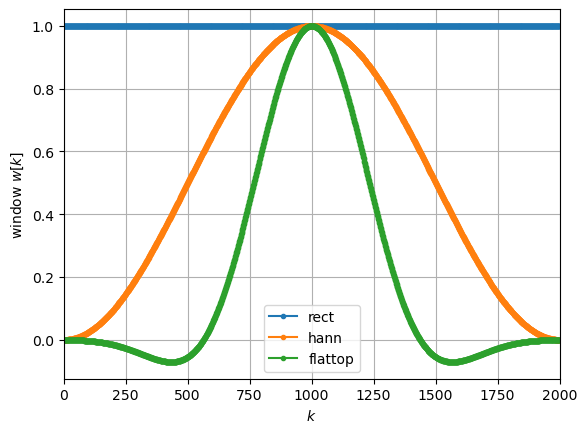

In [16]:
wrect = np.ones(N)
whann = hann(N, sym=False)
wflattop = flattop(N, sym=False)

plt.plot(wrect, "C0o-", ms=3, label="rect")
plt.plot(whann, "C1o-", ms=3, label="hann")
plt.plot(wflattop, "C2o-", ms=3, label="flattop")
plt.xlabel(r"$k$")
plt.ylabel(r"window $w[k]$")
plt.xlim(0, N)
plt.legend()
plt.grid(True)

windowing signals

In [17]:
# 0-rect, 1-hann, 3-flattop
x1windows = (fft(x1), fft(x1 * whann), fft(x1 * wflattop))
x2windows = (fft(x2), fft(x2 * whann), fft(x2 * wflattop))
x3windows = (fft(x3), fft(x3 * whann), fft(x3 * wflattop))

The function written below, converts FFT in term of sine normalization.<br>
Implementation can handle odd and even value of N.

In [18]:
# this handling is working for N even and odd:
def fft2db(X:np.ndarray):
    N = X.size
    Xtmp = 2 / N * X  # independent of N, norm for sine amplitudes
    Xtmp[0] *= 1 / 2  # bin for f=0 Hz is existing only once, so cancel *2 from above
    if N % 2 == 0:  # fs/2 is included as a bin
        # fs/2 bin is existing only once, so cancel *2 from above
        Xtmp[N // 2] = Xtmp[N // 2] / 2
    return 20 * np.log10(np.abs(Xtmp))  # in dB


# setup of frequency vector this way is independent of N even/odd:
df = FS / N
f = np.arange(N) * df

DFT spectra are shown on plots below.<br>
The frequency of each signal can be easilly read.

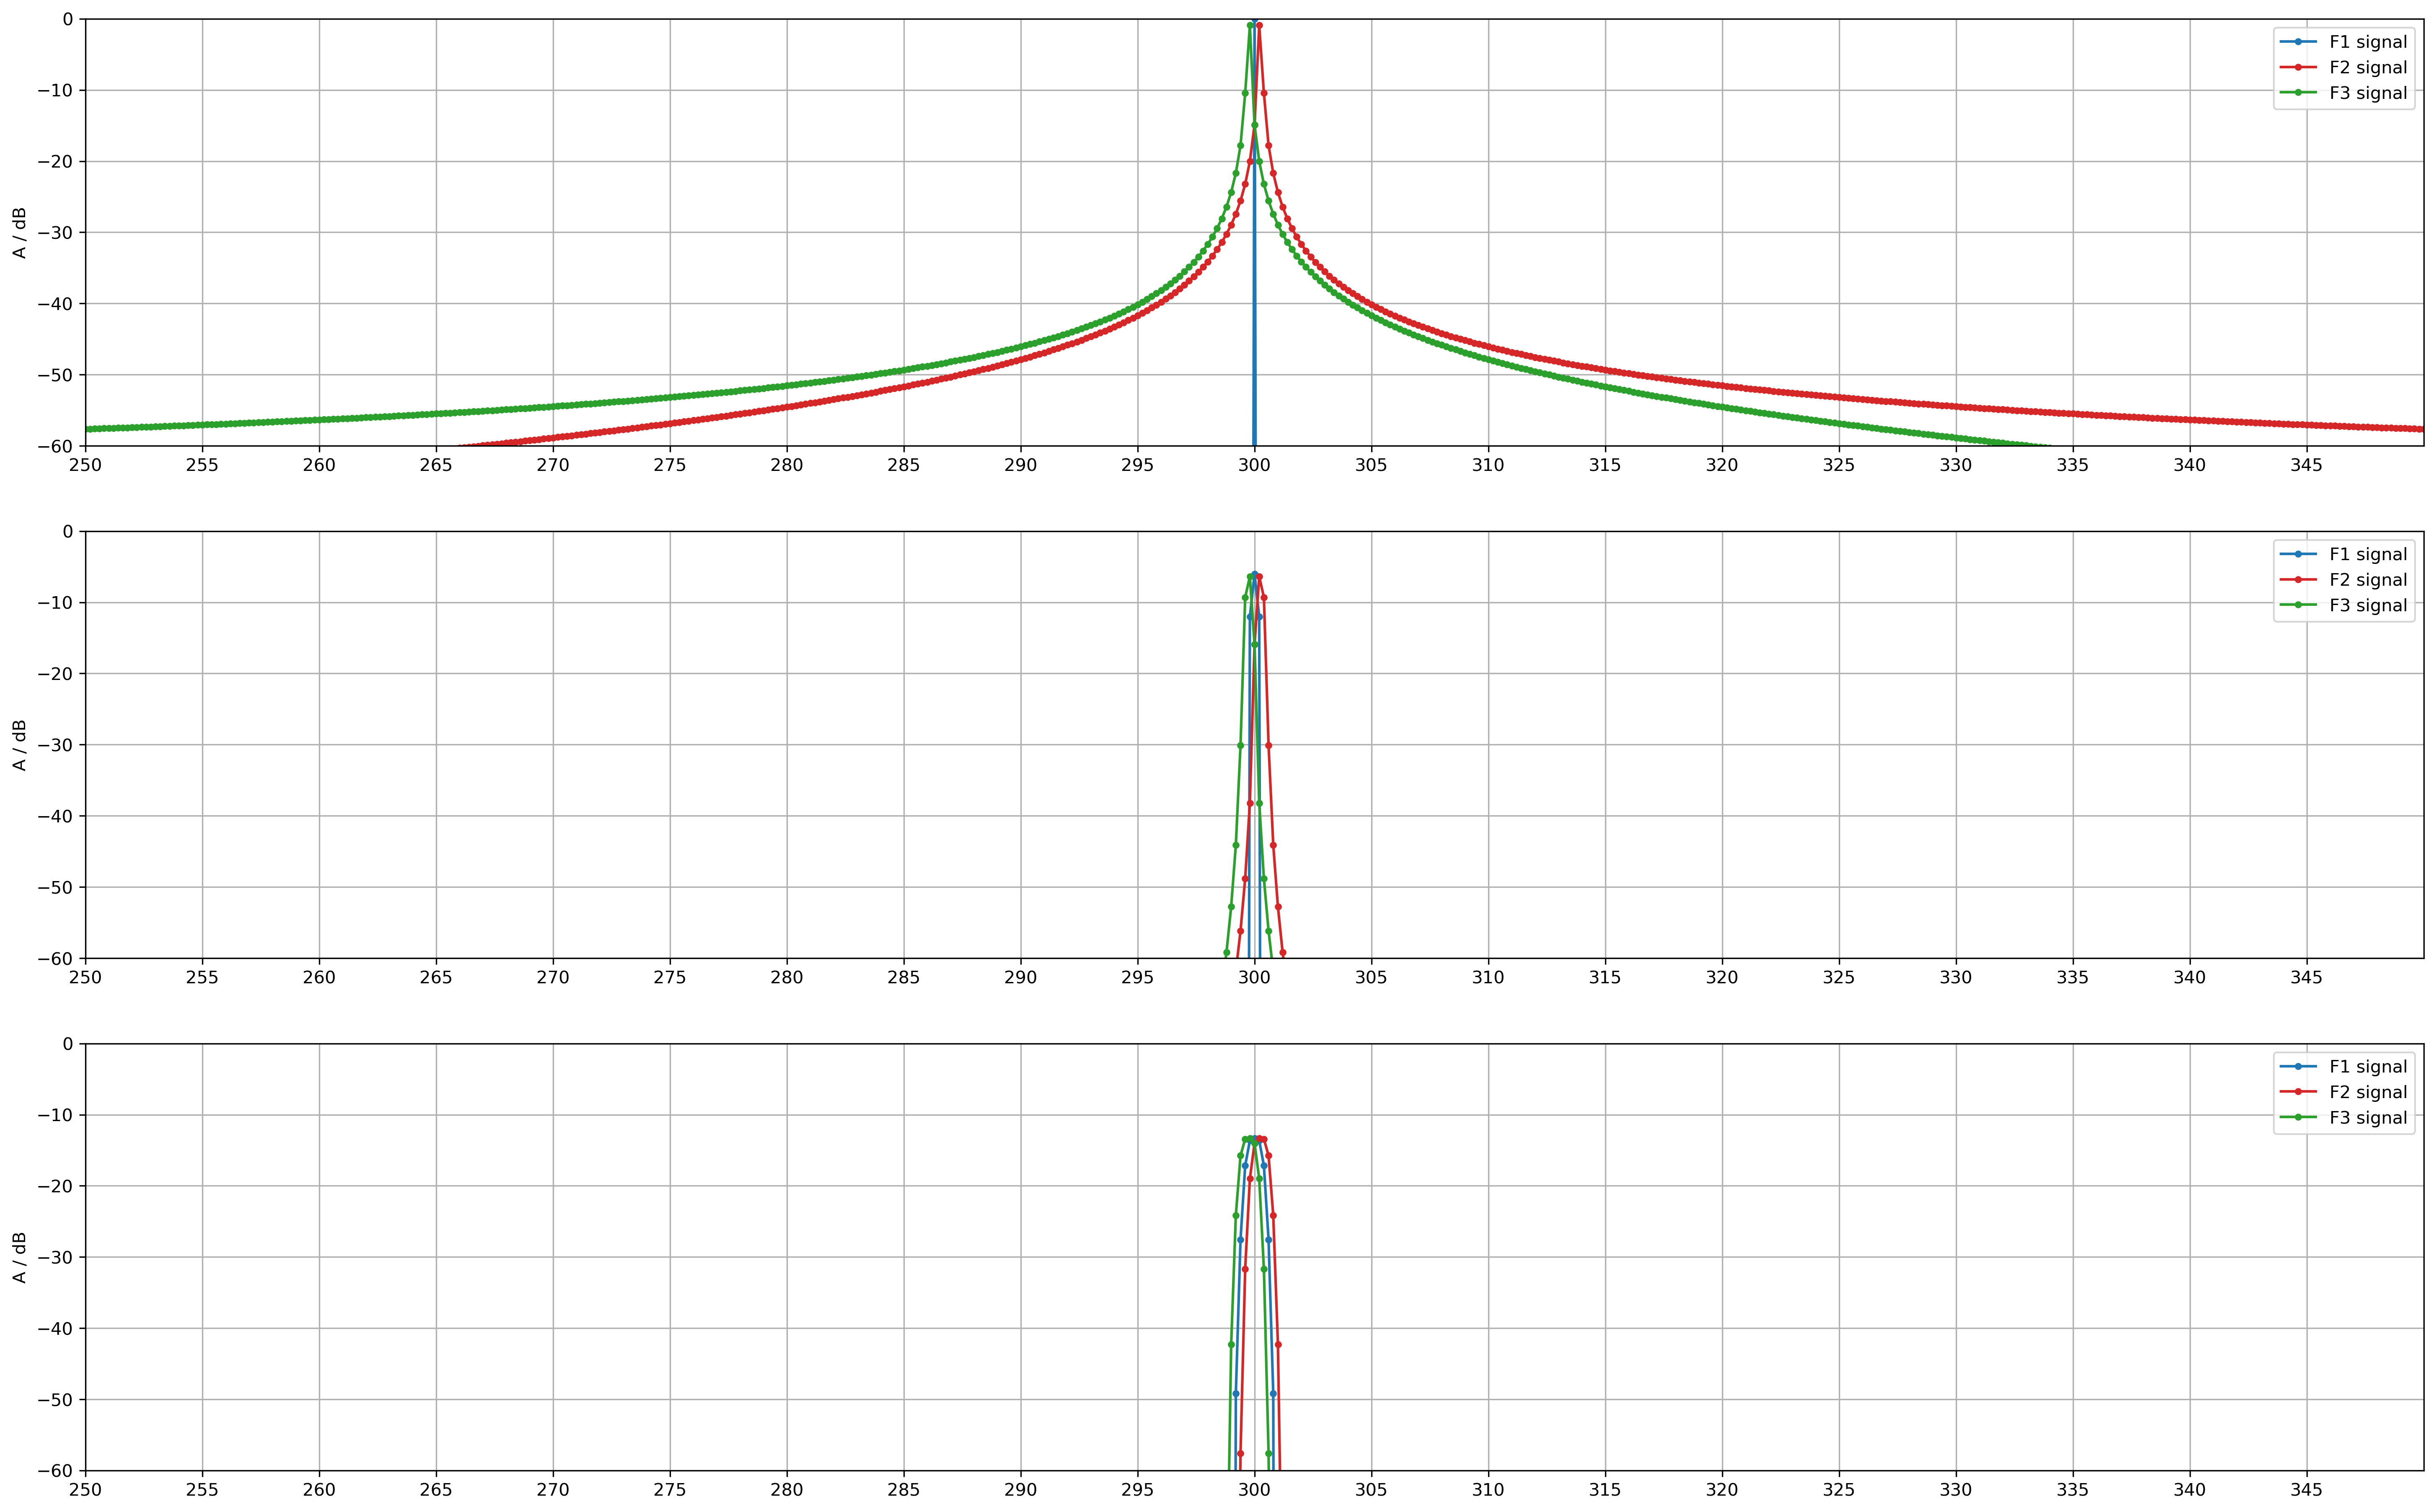

In [19]:
expected_frequency = ((sum([F1, F2, F3])/3)/2)* TMPMU
X_TICK_MIN = expected_frequency - 50
X_TICK_MAX = expected_frequency + 50

plt.figure(figsize=(16 * 1.5, 10 * 1.5), dpi=300)
for x in range(3):
    plt.subplot(3, 1, x+1)
    plt.plot(f, fft2db(x1windows[x]), "C0o-", ms=3, label="F1 signal")
    plt.plot(f, fft2db(x2windows[x]), "C3o-", ms=3, label="F2 signal")
    plt.plot(f, fft2db(x3windows[x]), "C2o-", ms=3, label="F3 signal")
    plt.xlim(X_TICK_MIN, X_TICK_MAX)
    plt.ylim(-60, 0)
    plt.xticks(np.arange(X_TICK_MIN, X_TICK_MAX, 5))
    plt.yticks(np.arange(-60, 10, 10))
    plt.legend()
    # plt.xlabel('f / Hz')
    plt.ylabel("A / dB")
    plt.grid(True)

the window DTFT spectra normalized to their mainlobe maximum.

In [20]:
def winDTFTdB(w:np.ndarray):
    N = w.size  # get window length
    Nz = 100 * N  # zeropadding length
    W = np.zeros(Nz)  # allocate RAM
    W[0:N] = w  # insert window
    W = np.abs(fftshift(fft(W)))  # fft, fftshift and magnitude
    W /= np.max(W)  # normalize to maximum, i.e. the mainlobe maximum here
    W = 20 * np.log10(W)  # get level in dB
    # get appropriate digital frequencies
    Omega = 2 * np.pi / Nz * np.arange(Nz) - np.pi  # also shifted
    return Omega, W

------------------------------------
Signal X1, freq=300Hz
rect window mainlobe bandwidth is 0.1760000000000275 Hz, 0.00276460153515945 rad
hann window mainlobe bandwidth is 0.1760000000000275 Hz, 0.00276460153515945 rad
flattop window mainlobe bandwidth is 0.1760000000000275 Hz, 0.00276460153515945 rad


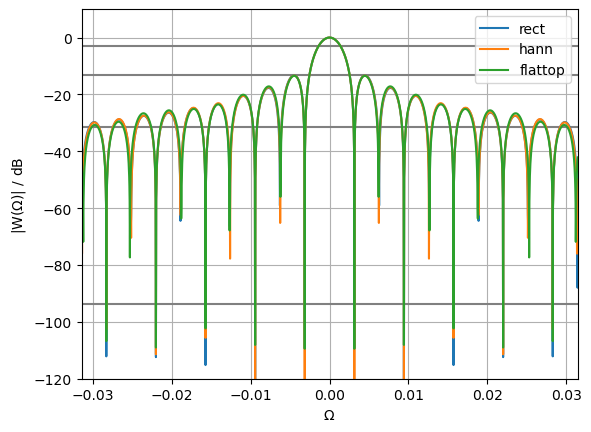

------------------------------------
Signal X2, freq=300Hz
rect window mainlobe bandwidth is 0.18000000000001143 Hz, 0.002827433388230993 rad
hann window mainlobe bandwidth is 0.1720000000000436 Hz, 0.0027017696820879067 rad
flattop window mainlobe bandwidth is 0.18000000000001143 Hz, 0.002827433388230993 rad


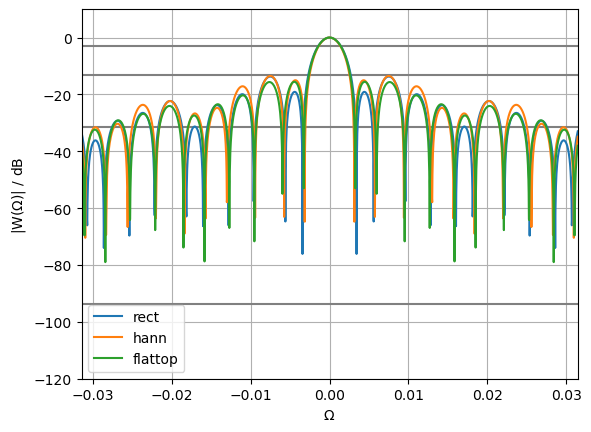

------------------------------------
Signal X3, freq=300Hz
rect window mainlobe bandwidth is 0.1640000000000192 Hz, 0.002576105975943932 rad
hann window mainlobe bandwidth is 0.1720000000000436 Hz, 0.0027017696820879067 rad
flattop window mainlobe bandwidth is 0.16800000000005966 Hz, 0.0026389378290163634 rad


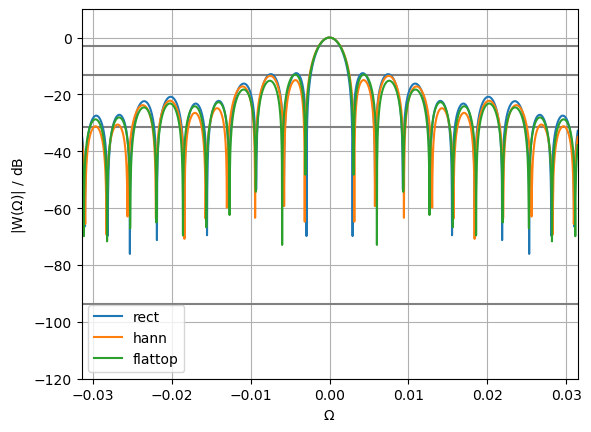

In [21]:
for idx, xnwin in enumerate([x1windows, x2windows, x3windows]):
    wrect_data = fft2db(xnwin[0])
    whann_data = fft2db(xnwin[1])
    wflattop_data = fft2db(xnwin[2])

    print("------------------------------------")
    print(f"Signal X{idx+1}, freq={F1}Hz")

    Omega, W = winDTFTdB(wrect_data)
    BW = Omega[W >= -3.01]
    print(
        "rect window mainlobe bandwidth is",
        (-BW[0] * 2) * FS / (2 * np.pi),
        "Hz,",
        (-BW[0] * 2),
        "rad",
    )

    Omega, W = winDTFTdB(whann_data)
    BW = Omega[W >= -3.01]
    print(
        "hann window mainlobe bandwidth is",
        (-BW[0] * 2) * FS / (2 * np.pi),
        "Hz,",
        (-BW[0] * 2),
        "rad")
    Omega, W = winDTFTdB(wflattop_data)
    BW = Omega[W >= -3.01]
    print(
        "flattop window mainlobe bandwidth is",
        (-BW[0] * 2) * FS / (2 * np.pi),
        "Hz,",
        (-BW[0] * 2),
        "rad",
    )

    plt.plot([-np.pi, +np.pi], [-3.01, -3.01], "gray")  # mainlobe bandwidth
    plt.plot([-np.pi, +np.pi], [-13.3, -13.3], "gray")  # rect max sidelobe
    plt.plot([-np.pi, +np.pi], [-31.5, -31.5], "gray")  # hann max sidelobe
    plt.plot([-np.pi, +np.pi], [-93.6, -93.6], "gray")  # flattop max sidelobe

    Omega, W = winDTFTdB(wrect_data)
    plt.plot(Omega, W, label="rect")
    Omega, W = winDTFTdB(whann_data)
    plt.plot(Omega, W, label="hann")
    Omega, W = winDTFTdB(wflattop_data)
    plt.plot(Omega, W, label="flattop")
    plt.xlim(-np.pi, np.pi)
    plt.ylim(-120, 10)

    plt.xlim(-np.pi / 100, np.pi / 100)  # zoom into mainlobe

    plt.xlabel(r"$\Omega$")
    plt.ylabel(r"|W($\Omega$)| / dB")
    plt.legend()
    plt.grid(True)
    plt.show()